## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o consumo de cerveja.

In [72]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [73]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [74]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [75]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [76]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [77]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [78]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [79]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', 
                 input_dim=Xi_train.shape[1])) 

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) 

In [80]:
# Treinando a rede neural:
k_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = k_model.fit(Xi_train, yi_train, 
                       epochs=200, 
                       batch_size=32,
                       validation_data=(Xi_test, yi_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 53.5571 - mae: 6.4758 - val_loss: 42.5501 - val_mae: 5.7683
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 48.2984 - mae: 6.1177 - val_loss: 35.4629 - val_mae: 5.1488
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40.3973 - mae: 5.4387 - val_loss: 29.3485 - val_mae: 4.5726
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.4691 - mae: 4.4822 - val_loss: 24.2393 - val_mae: 4.0238
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 25.2821 - mae: 4.0594 - val_loss: 20.0336 - val_mae: 3.5612
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.1542 - mae: 3.8496 - val_loss: 16.6816 - val_mae: 3.1991
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.6110 - mae: 3.5526 - val_loss: 14.2127 - val_mae: 2.9254
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.6886 - mae: 3.4553 - val_loss: 12.4328 - val_mae: 2.7329
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

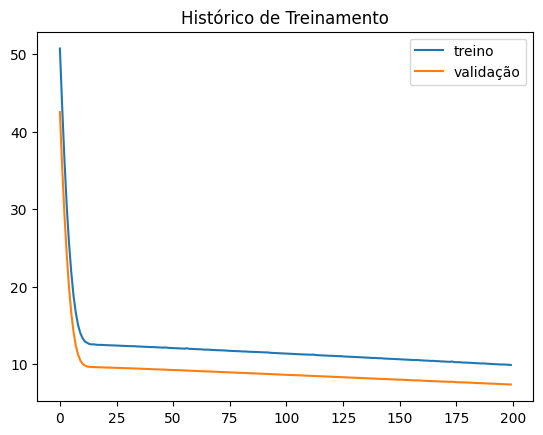

In [81]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [82]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [83]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [84]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[22.54661 ],
       [19.617823],
       [25.932562],
       [17.077814],
       [20.599371],
       [26.521708],
       [23.788397],
       [18.264347],
       [19.481224],
       [27.610138],
       [25.442606],
       [30.027863],
       [29.884926],
       [27.23214 ],
       [25.501032],
       [30.244715],
       [26.937206],
       [26.217897],
       [27.24319 ],
       [28.853466],
       [21.939259],
       [22.108915],
       [25.255642],
       [23.890028],
       [23.590837],
       [26.8613  ],
       [19.389555],
       [25.333   ],
       [25.413618],
       [23.831604],
       [29.548956],
       [19.21736 ],
       [27.436493],
       [30.292904],
       [26.24996 ],
       [20.246914],
       [24.288046],
       [17.486883],
       [25.585907],
       [29.77749 ],
       [21.625753],
       [29.090973],
       [34.8009  ],
       [23.550072],
       [25.2147  ],
       [28.036055],
       [16.82029 ],
       [26.424692],
       [19.666376],
       [21.679558],


In [85]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']